In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [44]:

df=pd.read_csv(r'C:\Users\samcr\OneDrive\Escritorio\Maestria\Ciencia de datos en Python 1\Lab3\Lab3\NucleosPoblacion.csv')
df.columns

Index(['FID', 'OBJECTID', 'Texto', 'Poblacion', 'CodMun', 'Municipio',
       'CodProvin', 'Provincia', 'X', 'Y'],
      dtype='object')

In [45]:

#Ejercicio 1:
umbral_poblacion = 100000  # Este valor es un ejemplo, ajustar según el ejercicio específico.
municipios_sobre_umbral = df[df['Poblacion'] > umbral_poblacion].count()


<Axes: xlabel='Municipio'>

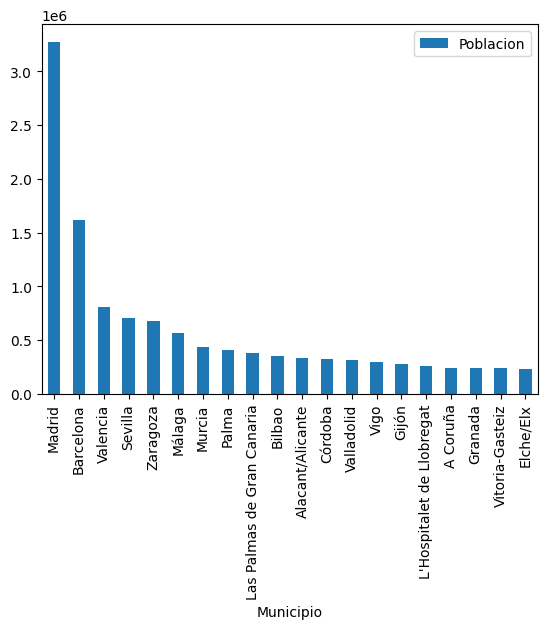

In [46]:

#Ejercicio 2: Crear un gráfico de barras de poblaciones de ciudades.
df.sort_values(by='Poblacion', ascending=False).head(20).plot(kind='bar', x='Municipio', y='Poblacion')
#La segunda ciudad mas poblada es Barcelona y granada ocupa el 18 lugar


In [47]:

#Ejercicio 3: Identificar municipios en Extremadura con poblaciones por encima de un número específico.
municipios_extremadura = df[(df['Provincia'] == 'Extremadura') & (df['Poblacion'] > 5000)].count()


In [48]:
#Ejercicio 4: Encontrar el municipio más al norte.
municipio_mas_al_norte = df.loc[df['Y'].idxmax()]
print(municipio_mas_al_norte)

FID                104
OBJECTID           105
Texto          Viveiro
Poblacion      16211.0
CodMun           27066
Municipio      Viveiro
CodProvin           27
Provincia         Lugo
X            -7.588768
Y            43.625578
Name: 104, dtype: object


In [49]:
#Ejercicio 5: Calcular medidas estadísticas para la población de municipios en la provincia de Granada.
estadisticas_granada = df[df['Provincia'] == 'Granada']['Poblacion'].describe()
print(estadisticas_granada)

count        20.000000
mean      30217.850000
std       50355.491715
min       10386.000000
25%       13146.500000
50%       17526.000000
75%       21739.750000
max      239154.000000
Name: Poblacion, dtype: float64


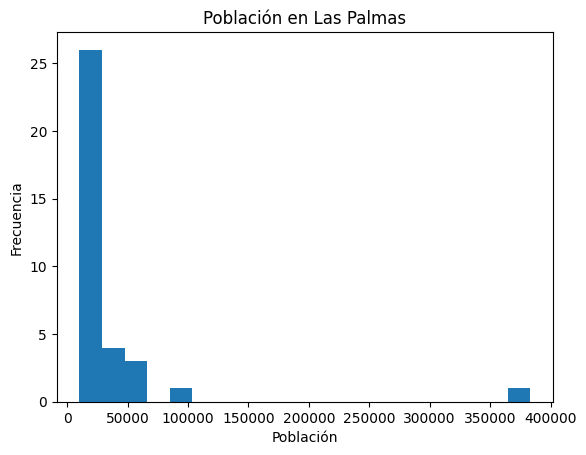

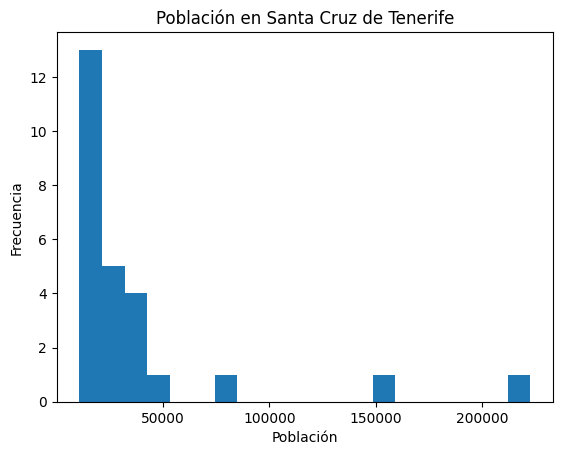

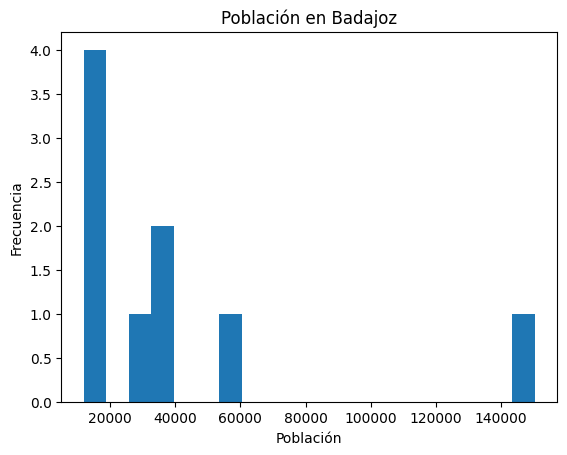

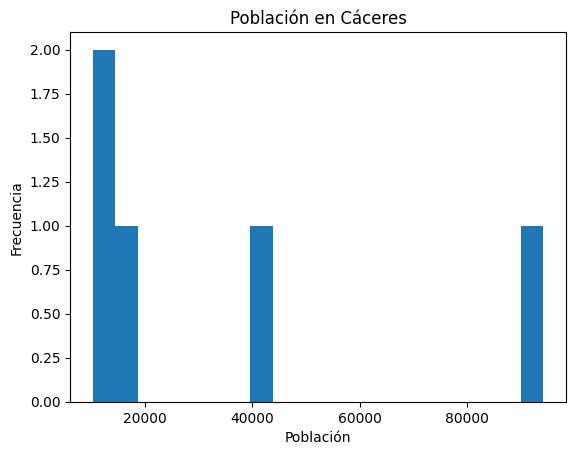

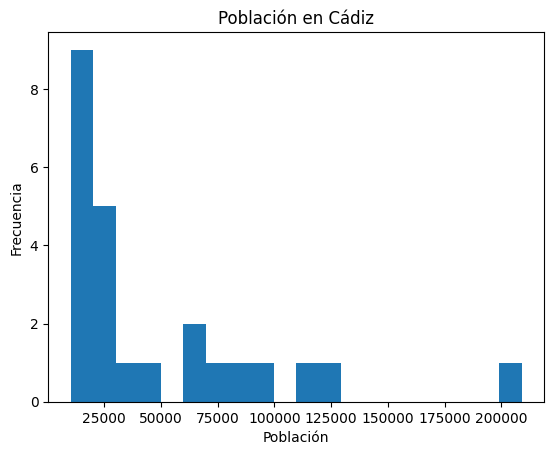

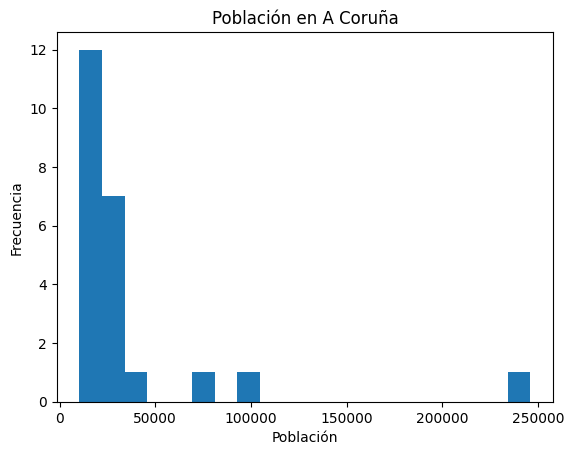

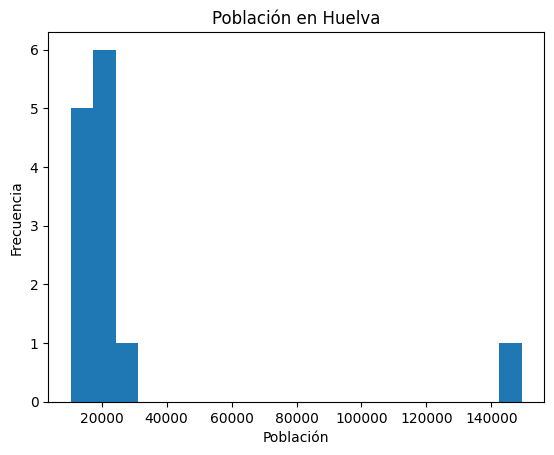

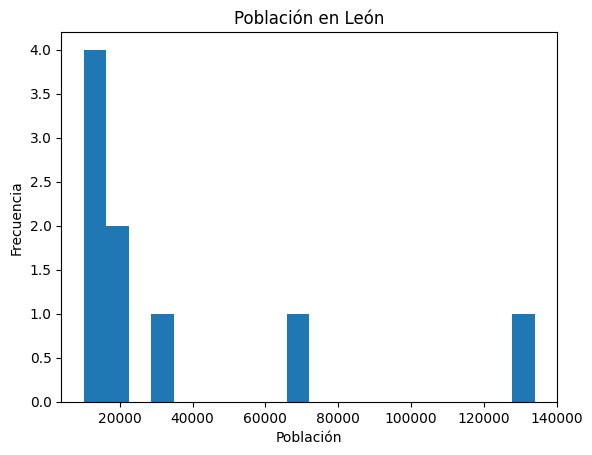

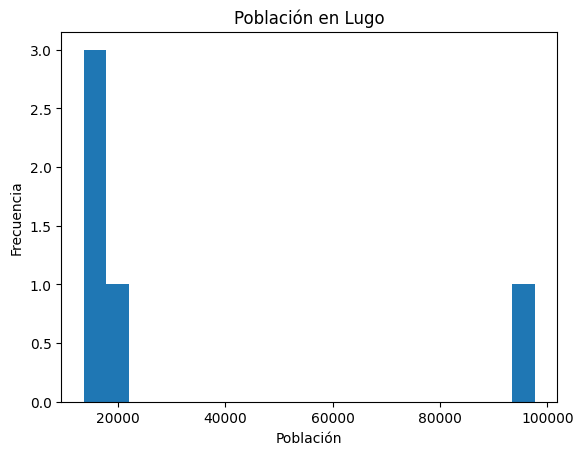

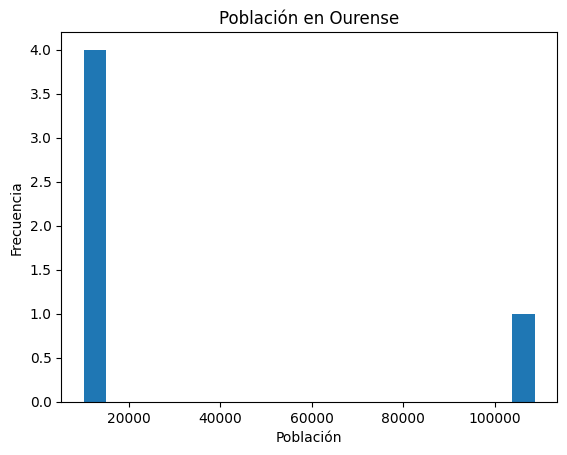

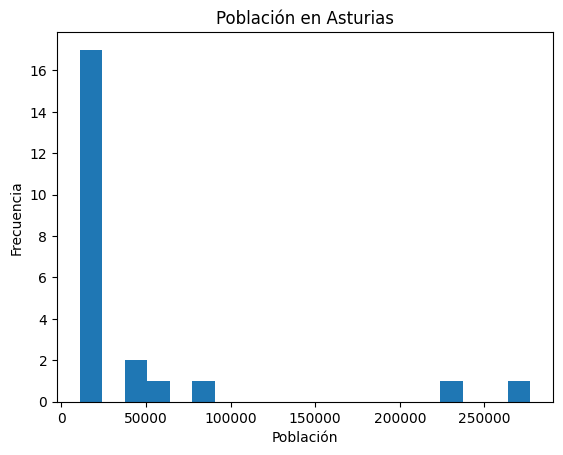

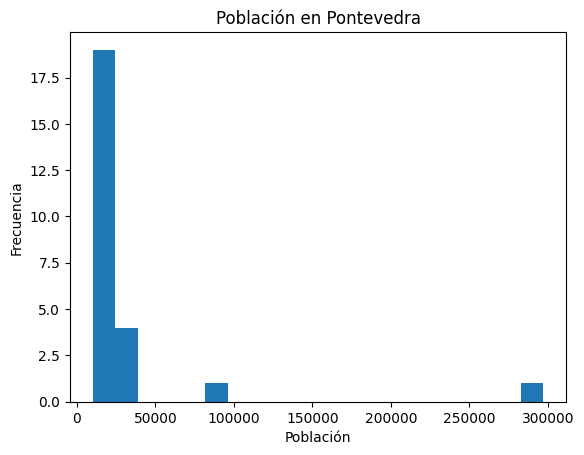

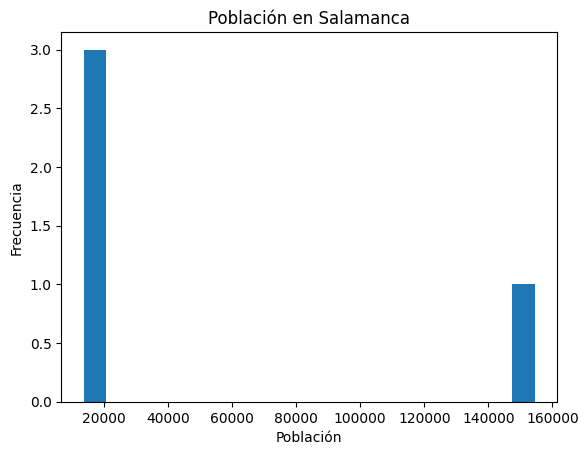

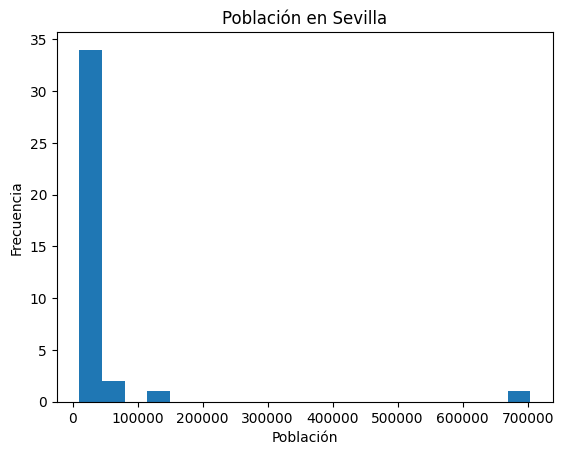

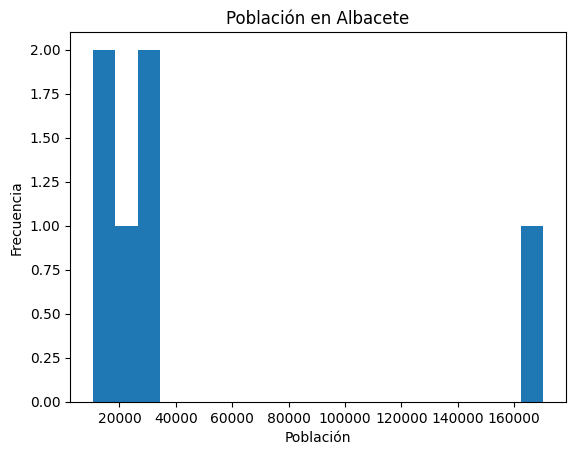

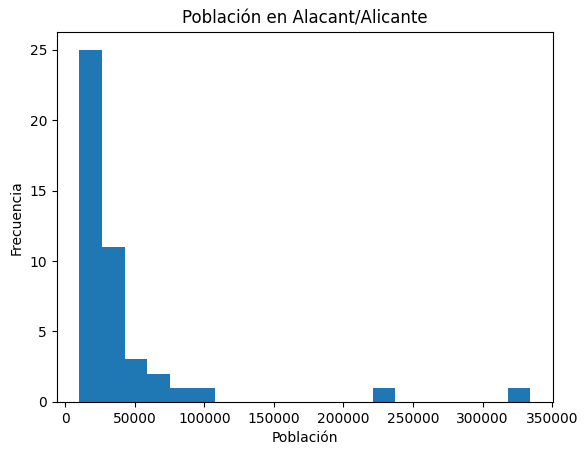

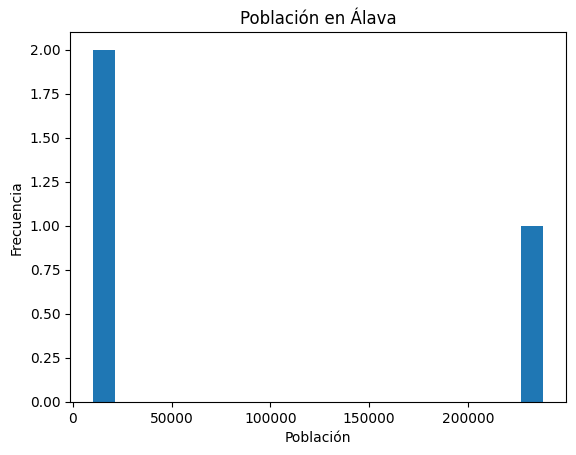

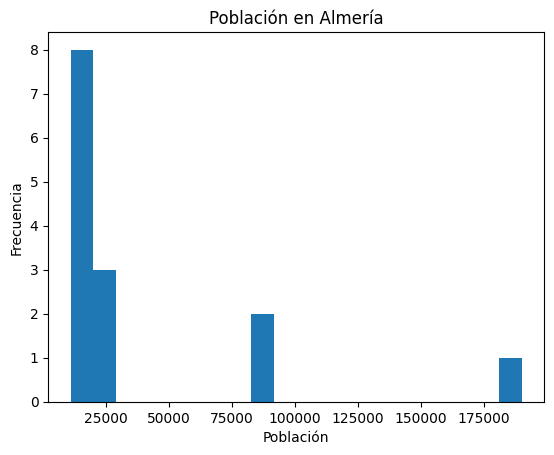

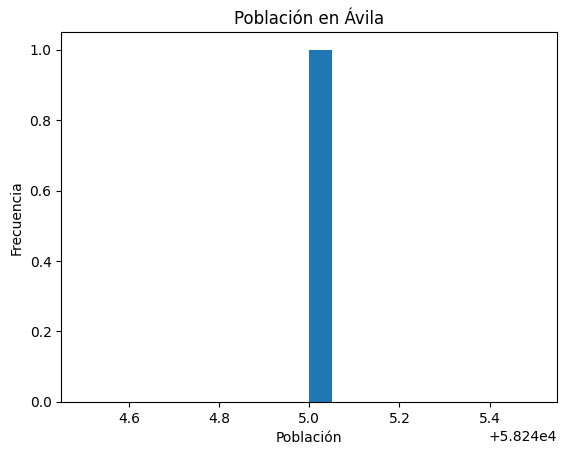

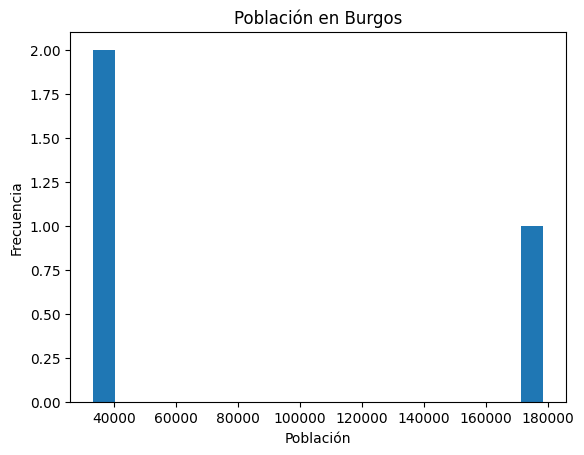

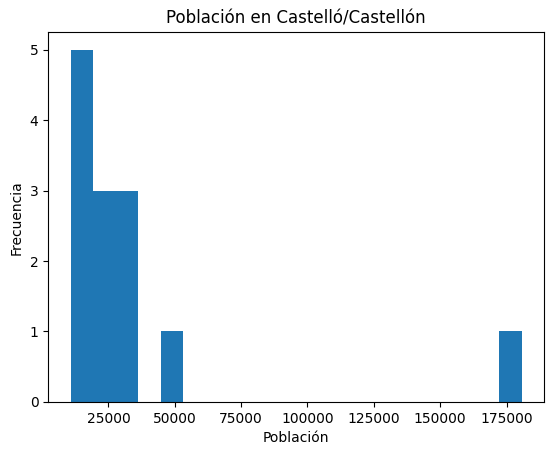

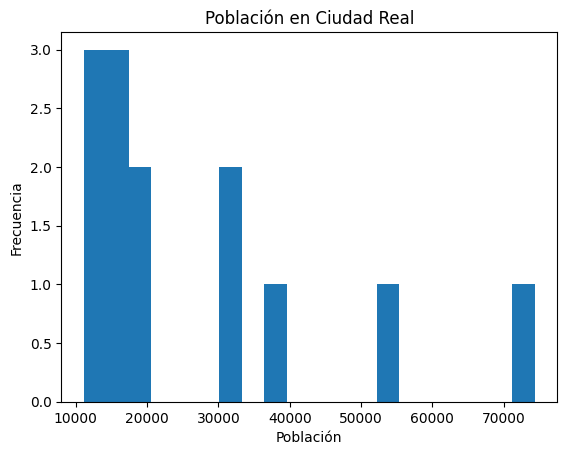

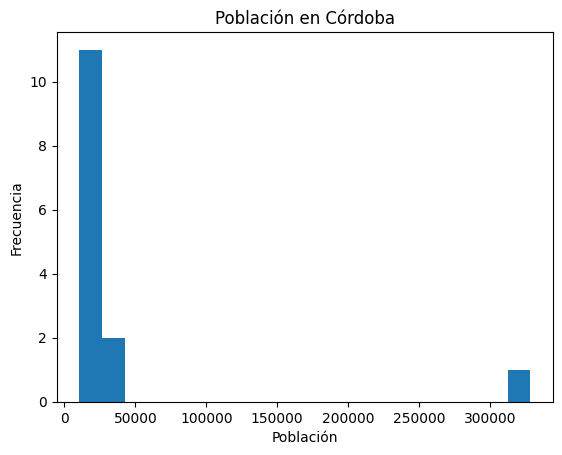

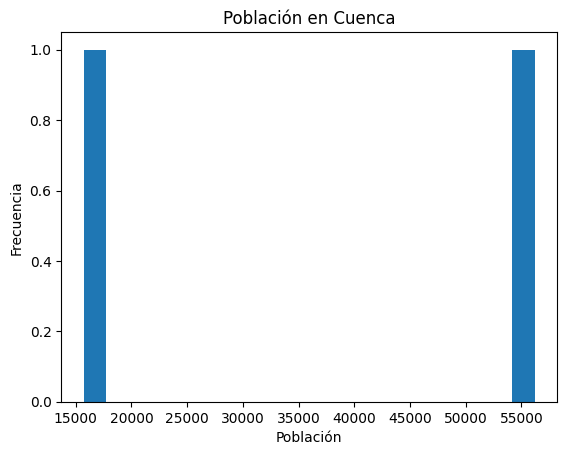

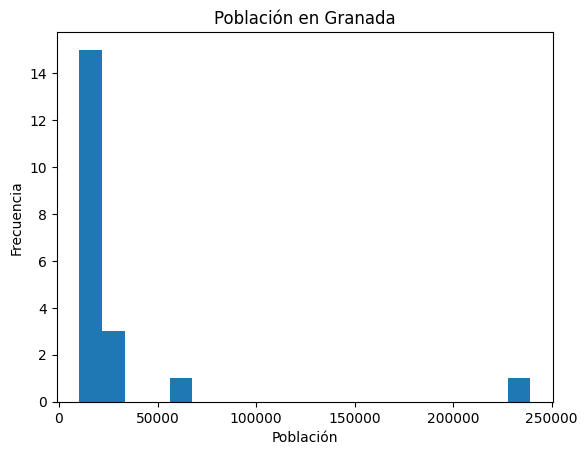

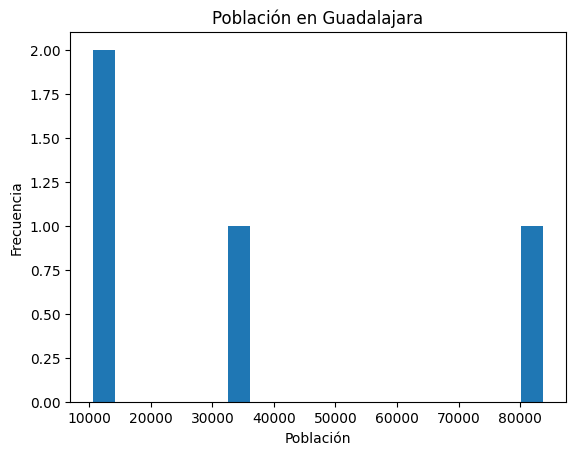

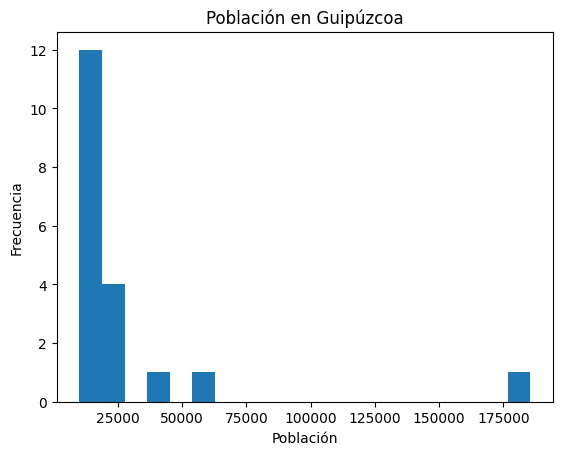

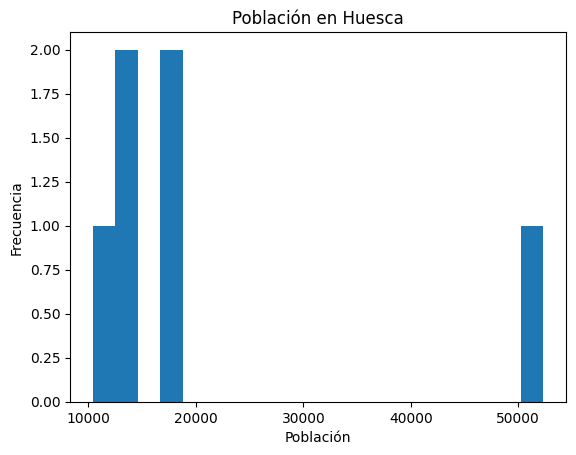

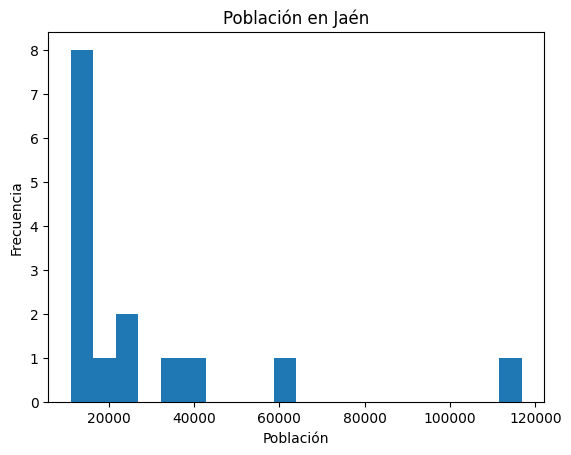

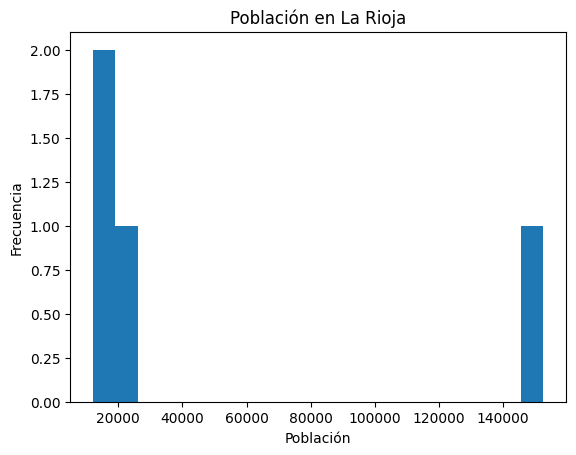

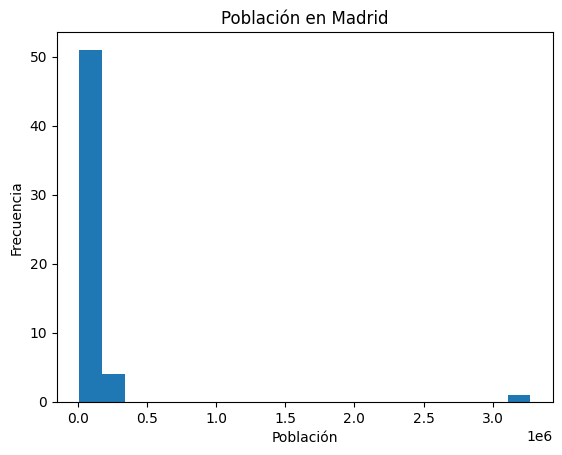

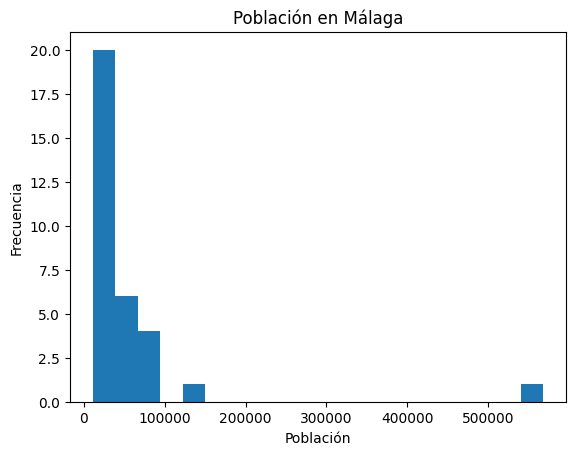

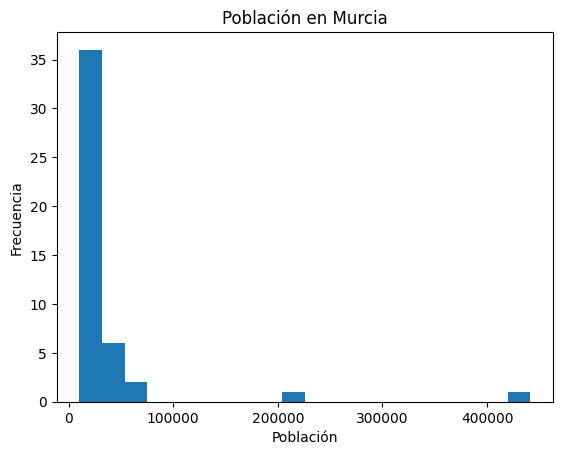

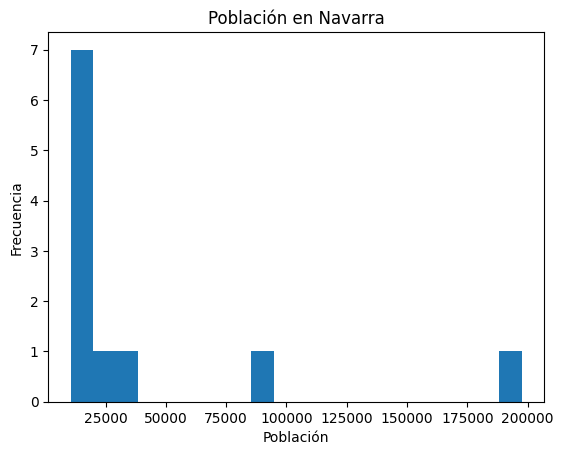

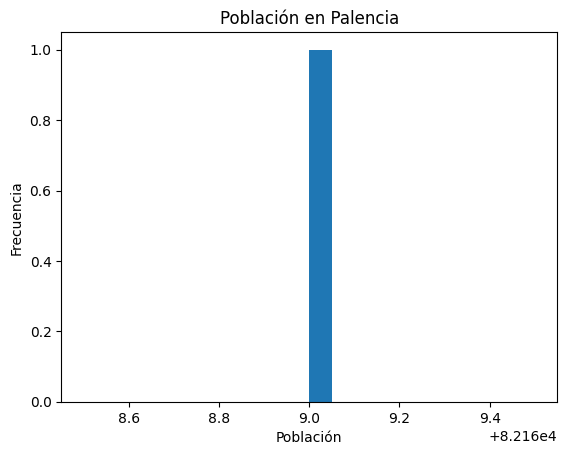

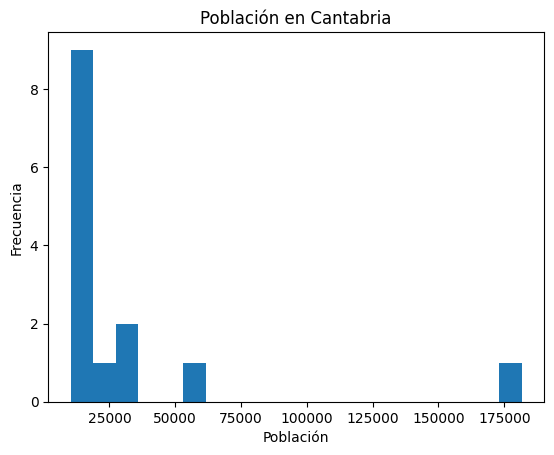

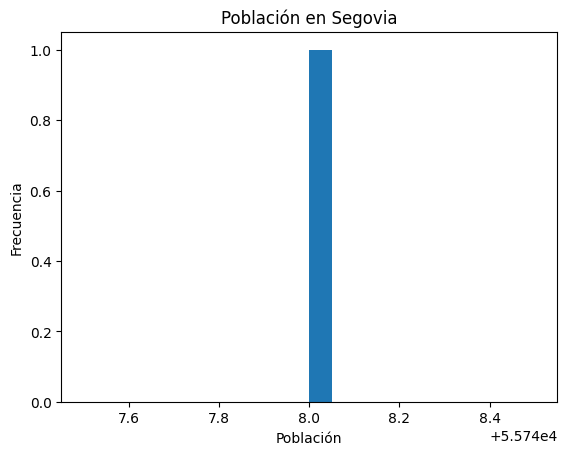

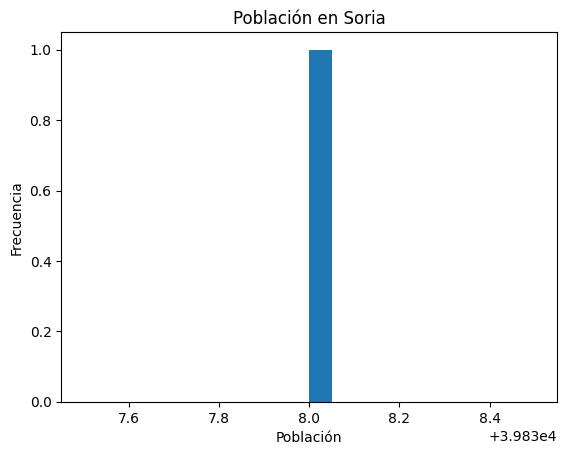

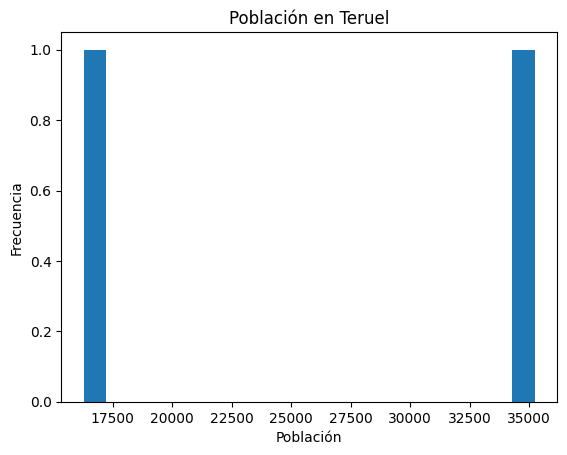

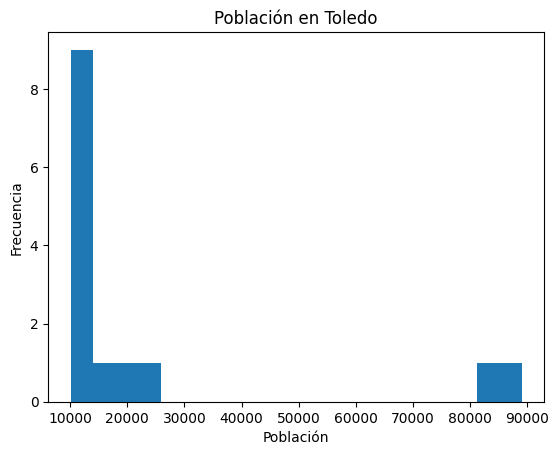

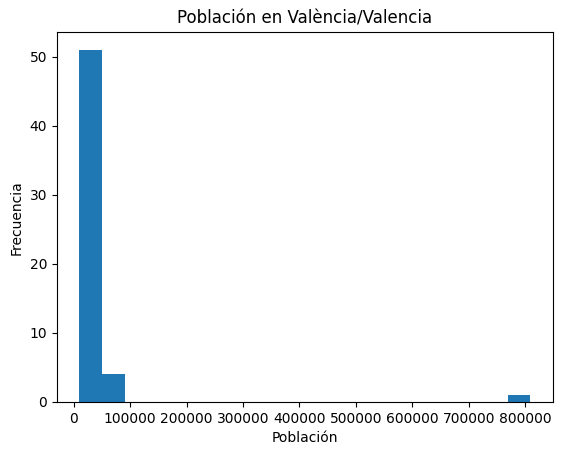

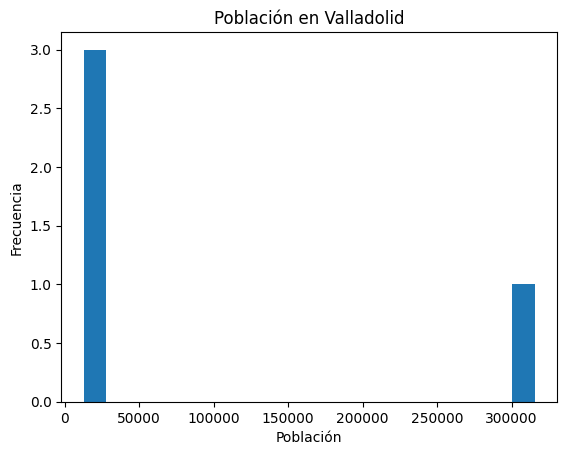

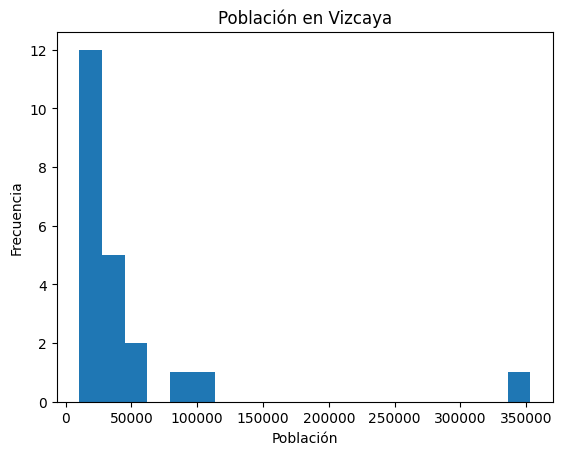

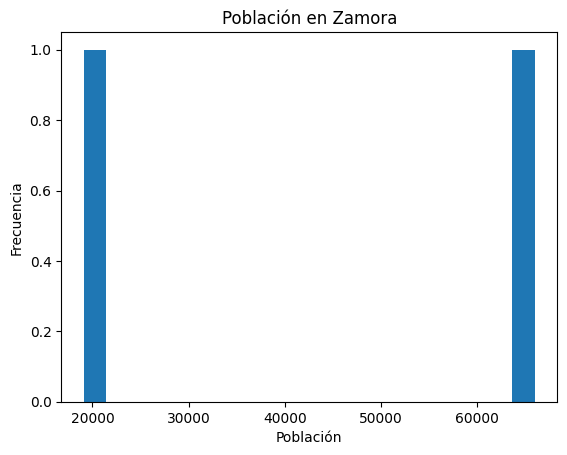

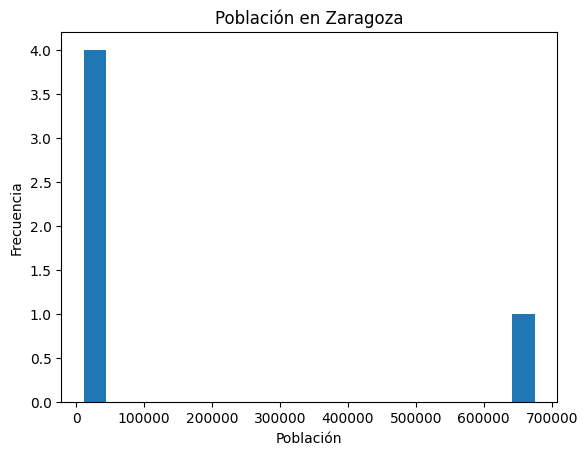

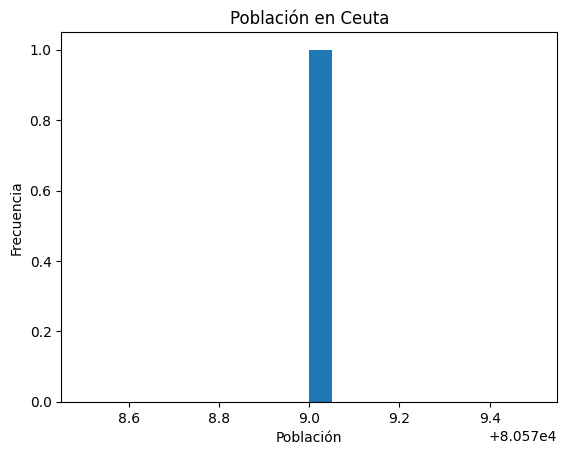

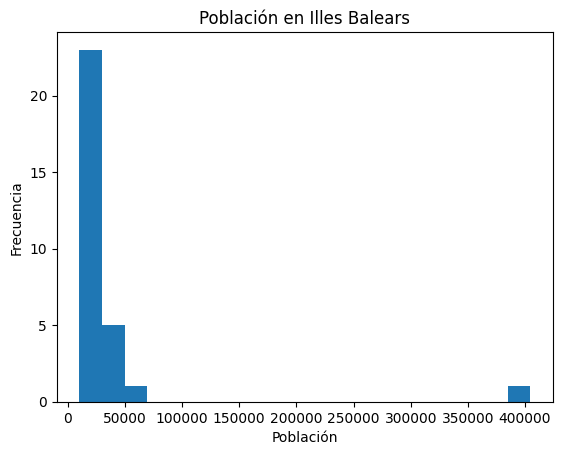

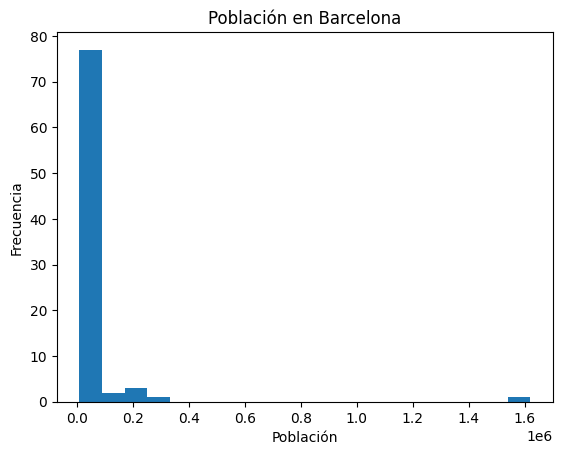

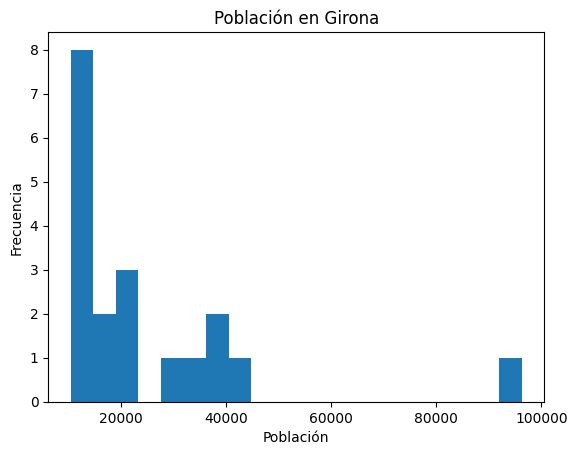

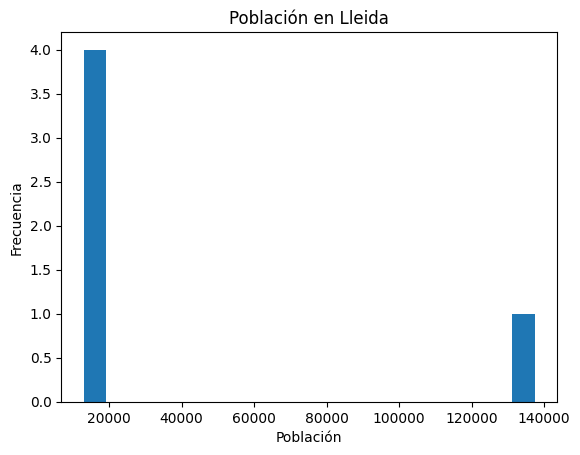

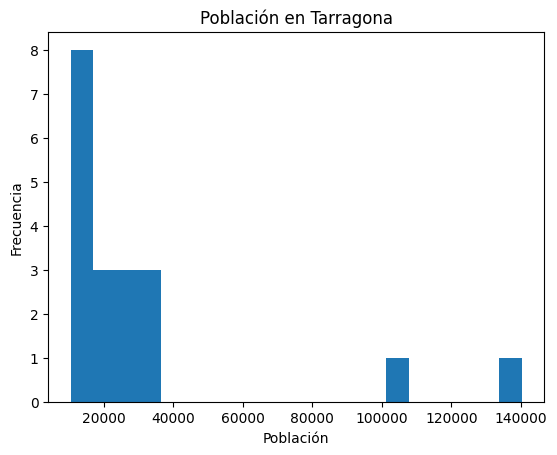

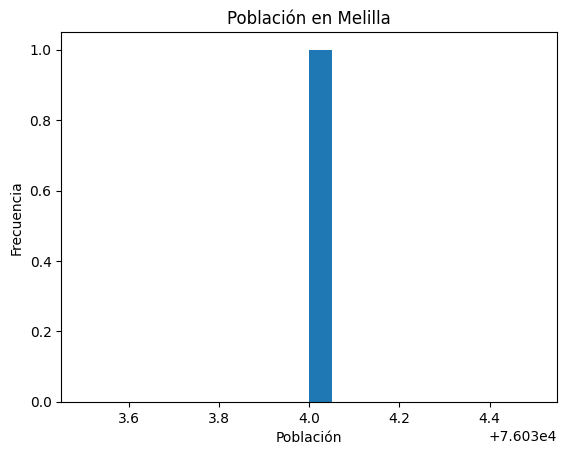

In [50]:
# Ejercicio 6: Crear histogramas de población por provincia.
provincias = df['Provincia'].unique()
for provincia in provincias:
    plt.figure()
    poblacion_provincia = df[df['Provincia'] == provincia]['Poblacion']
    plt.hist(poblacion_provincia, bins=20)
    plt.title(f'Población en {provincia}')
    plt.xlabel('Población')
    plt.ylabel('Frecuencia')
    plt.show()

In [51]:
#Ejercicio 7
municipios_aleatorios_unicos = df.drop_duplicates().sample(n=50)

# Calcular la media y desviación estándar de la población de estos municipios
media_poblacion_unicos = municipios_aleatorios_unicos['Poblacion'].mean()
desviacion_poblacion_unicos = municipios_aleatorios_unicos['Poblacion'].std()

# Imprimir resultados
print("Media de población de los 50 municipios:", media_poblacion_unicos)
print("Desviación estándar de la población de los 50 municipios:", desviacion_poblacion_unicos)



Media de población de los 50 municipios: 96942.02
Desviación estándar de la población de los 50 municipios: 459440.2562008


In [52]:

df_filtrado = df[df['Municipio'] != 'Madrid']

# Coordenadas de Madrid
lat_madrid, lon_madrid = 40.416775, -3.703790
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radio de la Tierra en km
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = R * c
    return distance

# Aplicar la función de Haversine para calcular distancias desde Madrid a cada municipio
df_filtrado['Distancia'] = df_filtrado.apply(lambda row: haversine(lat_madrid, lon_madrid, row['Y'], row['X']), axis=1)

# Encontrar el municipio más cercano y el más lejano de Madrid
municipio_mas_cercano = df_filtrado.loc[df_filtrado['Distancia'].idxmin()]
municipio_mas_lejano = df_filtrado.loc[df_filtrado['Distancia'].idxmax()]

print("Municipio más cercano a Madrid:", municipio_mas_cercano['Municipio'])
print("Municipio más lejano de Madrid:", municipio_mas_lejano['Municipio'])


Municipio más cercano a Madrid: Pozuelo de Alarcón
Municipio más lejano de Madrid: Los Llanos de Aridane
